## Importing useful packages

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np

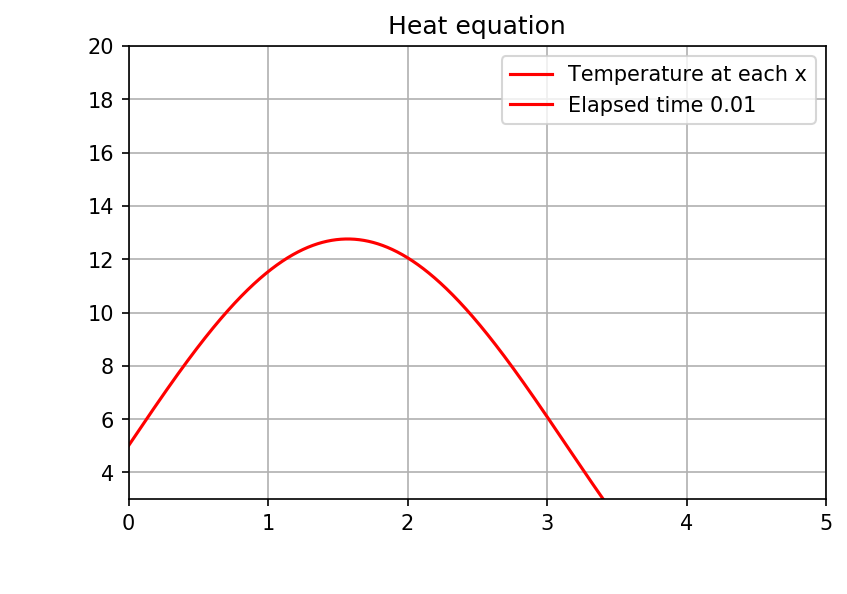

In [12]:
fig = plt.figure()
fig.set_dpi(150)
ax1 = fig.add_subplot(1,1,1)


# Diffusion coefficient
k = 3

# Scaling factor (for visualisation)
scale = 8

# Length of the rod (0,L) on the x axis
L = 5

# Initial contitions on boundary
x0 = np.linspace(0,L+1,10000)
t0 = 0
temp0 = 5  #Temperature of the rod at rest (before heating)

# Time sprecision
dt = 0.01

# Heat function
def u(x,t):
    return temp0 + scale*np.exp(-k*t)*np.sin(x)

# Gradient of u
def grad_u(x,t):
                               #du/dx              #du/dt
    return scale*np.array([np.exp(-k*t)*np.cos(x),-k*np.exp(-k*t)*np.sin(x)])

a = []
t = []

for i in range(500):
    value = u(x0,t0) + grad_u(x0,t0)[1]*dt
    t.append(t0)
    t0 = t0 + dt
    a.append(value)

k = 0
def animate(i):         #The plot shows the temperature evolving with time
    global k            #at each point x in the rod
    x = a[k]            #The ends of the rod are kept at temperature temp0
    k += 1              #The rod is heated in one spot, then it cools down
    ax1.clear()
    plt.plot(x0,x,color='red',label='Temperature at each x')
    plt.plot(0,0,color='red',label='Elapsed time '+str(round(t[k],2)))
    plt.grid(True)
    plt.ylim([temp0-2,2.5*scale])
    plt.xlim([0,L])
    plt.title('Heat equation')
    plt.legend()
    
anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()